In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def convert_img_to_set(img):
    if img is None:
        return set()
    foreground_coords = np.where(img == 255)
    return set(zip(foreground_coords[1], foreground_coords[0]))

In [2]:
def convert_set_to_img(pixel_set, shape):
    img = np.zeros(shape, dtype=np.uint8)
    for x, y in pixel_set:
        if 0 <= y < shape[0] and 0 <= x < shape[1]:
            img[y, x] = 255
    return img



In [3]:
def get_se_offsets(se_shape, origin):
    se_h, se_w = se_shape
    origin_x, origin_y = origin
    offsets = set()
    for y in range(se_h):
        for x in range(se_w):
            offsets.add((x - origin_x, y - origin_y))
    return offsets


In [4]:
def dilation(image_set, se_offsets, image_shape):#the inputs specified are derived from the binary image and structuring element only.
    dilated_set = set()
    img_h, img_w = image_shape
    for img_x, img_y in image_set:
        for se_dx, se_dy in se_offsets:
            new_x, new_y = img_x + se_dx, img_y + se_dy
            if 0 <= new_x < img_w and 0 <= new_y < img_h:
                dilated_set.add((new_x, new_y))
    return dilated_set

def erosion(image_set, se_offsets, image_shape):
    eroded_set = set()
    img_h, img_w = image_shape
    for y in range(img_h):
        for x in range(img_w):
            is_a_match = 1
            for se_dx, se_dy in se_offsets:
                check_x, check_y = x + se_dx, y + se_dy
                if (check_x, check_y) not in image_set:
                    is_a_match = 0
                    break
            if is_a_match:
                eroded_set.add((x, y))
    return eroded_set


Original Image


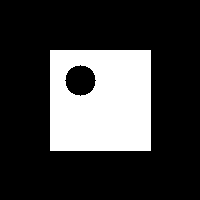


My Dilation function


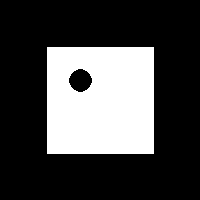


OpenCV Dilation function


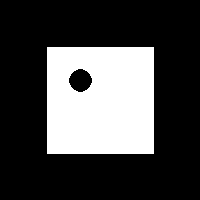


My Erosion function


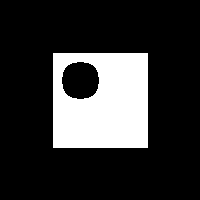


OpenCV Erosion function


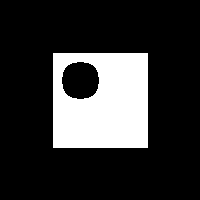

In [8]:
image_size = (200, 200)
sample_image = np.zeros(image_size, dtype=np.uint8)
cv2.rectangle(sample_image, (50, 50), (150, 150), 255, -1)
cv2.circle(sample_image, (80, 80), 15, 0, -1)

se_size = (7, 7)
se_origin = (3, 3)

img_shape = sample_image.shape
image_pixel_set = convert_img_to_set(sample_image)
se_offset_set = get_se_offsets(se_size, se_origin)


dilated_pixel_set = dilation(image_pixel_set, se_offset_set, img_shape)
custom_dilated_img = convert_set_to_img(dilated_pixel_set, img_shape)

eroded_pixel_set = erosion(image_pixel_set, se_offset_set, img_shape)
custom_eroded_img = convert_set_to_img(eroded_pixel_set, img_shape)
#Below is the open cv function to do dilation and erosion on  images.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, se_size)
opencv_dilated_img = cv2.dilate(sample_image, kernel, anchor=se_origin)
opencv_eroded_img = cv2.erode(sample_image, kernel, anchor=se_origin)

print("\nOriginal Image")
cv2_imshow(sample_image)

print("\nMy Dilation function")
cv2_imshow(custom_dilated_img)

print('\nOpenCV Dilation function')
cv2_imshow(opencv_dilated_img)

print('\nMy Erosion function')
cv2_imshow(custom_eroded_img)

print('\nOpenCV Erosion function')
cv2_imshow(opencv_eroded_img)